**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

In [1]:
#Import all the necessary modules

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from scipy.stats import zscore
%matplotlib inline

In [5]:
import warnings 
warnings.filterwarnings('ignore')

#### Execute the below cell to load the datasets

In [15]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### Check no.of records and features given in each dataset

In [16]:
books.shape 
#books dataset has 271360 records and 8 features as seen by shape  

(271360, 8)

In [17]:
users.shape
#users dataset has 278858 records and 3 features as seen by shape 

(278858, 3)

In [18]:
ratings.shape
#Books dataset has 1149780 records and 3 features as seen by shape 

(1149780, 3)

## Exploring books dataset

In [19]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [20]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

### Drop last three columns containing image URLs which will not be required for analysis

In [21]:
books.drop(['imageUrlS', 'imageUrlM','imageUrlL'] , axis=1 ,inplace=True)

In [22]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [26]:
books.yearOfPublication.unique() 

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [49]:
books[books.yearOfPublication  == "DK Publishing Inc"] #Gives the ids of rows

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [38]:
books["yearOfPublication"].value_counts()[['DK Publishing Inc']].sum() #Gives number of rows

2

In [34]:
books.groupby('yearOfPublication').size()

yearOfPublication
0                    3570
1806                    1
1900                    1
1901                    7
1902                    2
1904                    1
1906                    1
1908                    1
1910                    1
1911                   10
1914                    1
1917                    1
1920                   27
1921                    2
1923                    8
1924                    1
1925                    2
1926                    1
1927                    1
1928                    2
1929                    7
1930                   12
1931                    2
1932                    3
1933                    2
1934                    1
1935                    3
1936                    5
1937                    5
1938                    6
                     ... 
1986                 1583
1987                 1768
1988                 1947
1989                 2111
1990                 2266
1991                 2463
1992                

### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [54]:
books["yearOfPublication"].value_counts()[['DK Publishing Inc','Gallimard']].sum()
#Gives the total number of rows containing 'DK Publishing Inc' and 'Gallimard' in column yearOfPublication

3

In [58]:
books.drop(books.loc[books['yearOfPublication']== 'DK Publishing Inc'].index, inplace=True) 
#dropped rows having 'DK Publishing Inc' in column yearOfPublication

In [60]:
books.drop(books.loc[books['yearOfPublication']== 'Gallimard'].index, inplace=True)
#dropped rows having 'Gallimard' in column yearOfPublication

In [64]:
#Checking

books[books.yearOfPublication  == "Gallimard"]
books[books.yearOfPublication  == "DK Publishing Inc"]

# No record is shown
# We can see the records having "DK Publishing Inc" and "Gallimard" are removed from column Gallimard

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int'

In [ ]:
#Before datatype is changed
books.dtypes 

In [65]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int64')

In [66]:
#After datatype is changed
books.dtypes 
#Datatype is changed from object -> int64

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [69]:
books.isna().any()
# We can see "publisher" and bookAuthor column has NaN values

ISBN                 False
bookTitle            False
bookAuthor            True
yearOfPublication    False
publisher             True
dtype: bool

In [70]:
books.isnull().sum() 
# We can see "publisher" column has 2 Nan values

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [80]:
books = books[books['publisher'].notnull()]
print (books)

              ISBN                                          bookTitle  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
5       0399135782                             The Kitchen God's Wife   
6       0425176428  What If?: The World's Foremost Military Histor...   
7       0671870432                                    PLEADING GUILTY   
8       0679425608  Under the Black Flag: The Romance and the Real...   
9       074322678X            Where You'll Find Me: And Other Stories   
10      0771074670                        Nights Below Station Street   
11      080652121X  Hitler's Secret Bankers: The Myth of Swiss Neu...   
12      0887841740                                 

In [82]:
books.isnull().sum()
# We can see "publisher" column has no nan value now.

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            0
dtype: int64

## Exploring Users dataset

In [83]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [89]:
a = users['Age'].unique()
a.sort()
a

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

In [91]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [120]:
D1 = users['Age']
D2 = D1.where(D1 > 4)
D3 = D2.where(D1 < 91)
D3

[nan, 14.0, 18.0, nan, 17.0, nan, 14.0, 26.0, 61.0, nan, nan, nan, 19.0, 26.0, nan, nan, nan, nan, nan, 14.0, 19.0, 19.0, 20.0, 24.0, 24.0, 25.0, 46.0, nan, nan, 34.0, 55.0, nan, 32.0, nan, nan, 17.0, 17.0, 17.0, 21.0, 23.0, 23.0, 24.0, 30.0, 31.0, 32.0, 34.0, nan, nan, 30.0, 32.0, 34.0, 51.0, nan, nan, nan, nan, nan, 24.0, 43.0, 44.0, nan, nan, nan, nan, nan, 44.0, 57.0, nan, nan, nan, 24.0, 34.0, nan, 30.0, 37.0, nan, nan, 18.0, 20.0, nan, nan, nan, nan, nan, 41.0, nan, nan, nan, 19.0, 20.0, 26.0, 32.0, 36.0, 39.0, 42.0, 44.0, 47.0, 50.0, 54.0, nan, nan, nan, nan, 42.0, nan, 53.0, nan, nan, nan, 13.0, 20.0, nan, 24.0, 24.0, 25.0, 28.0, 32.0, nan, 47.0, 57.0, nan, nan, 24.0, 28.0, 35.0, 57.0, nan, nan, 49.0, 58.0, nan, nan, nan, 38.0, 45.0, nan, nan, nan, nan, 28.0, 35.0, nan, nan, 20.0, 20.0, 20.0, 26.0, 27.0, 29.0, 31.0, 36.0, 62.0, nan, nan, nan, 33.0, 44.0, 62.0, 63.0, nan, 24.0, 25.0, nan, 26.0, nan, nan, 38.0, nan, nan, nan, nan, nan, nan, 66.0, nan, nan, 28.0, 34.0, 46.0, nan, 

In [128]:
users.drop(['Age'] , axis=1 ,inplace=True)

In [129]:
users.head(5)

,userID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [133]:
users_new = pd.concat([users, D3], axis = 1)
users_new.sample(10)

,userID,Location,Age
39854,39855,"roma, ,",34.72384
229361,229362,"stuttgart, baden-wuerttemberg, germany",34.72384
33971,33972,"coniston, new south wales, australia",46.00000
236489,236490,"milano, lombardia, italy",35.00000
105118,105119,"toronto, ontario, canada",34.72384
99207,99208,"sydney, new south wales, australia",29.00000
135848,135849,"virginia beach, virginia, usa",39.00000
173787,173788,"tucson, arizona, usa",34.72384
225567,225568,"fontenay-sous-bois, paris, france",41.00000
117981,117982,"kielce, n/a, poland",34.72384


### Replace null values in column `Age` with mean

In [123]:
D3.fillna((D3.mean()), inplace=True)
D3.sample(20)

255421    34.72384
165159    29.00000
172884    41.00000
106449    34.00000
245768    34.72384
40754     34.72384
127636    34.72384
245501    50.00000
39096     34.72384
216340    34.72384
241691    34.72384
52213     60.00000
268518    51.00000
145444    27.00000
215369    34.72384
107730    33.00000
22347     34.72384
133479    40.00000
213614    19.00000
78375     34.72384
Name: Age, dtype: float64

### Change the datatype of `Age` to `int`

In [136]:
users_new.dtypes
# We can see Datatype of "Age" column is float64.

userID        int64
Location     object
Age         float64
dtype: object

In [138]:
users_new['Age'] = users_new['Age'].astype('int64')

In [139]:
users_new.dtypes
# Changed the Datatype of "Age" column from float64 --> int64

userID       int64
Location    object
Age          int64
dtype: object

In [141]:
print(sorted(users_new.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [115]:
ratings.shape

(1149780, 3)

In [116]:
n_users = users.shape[0]
n_books = books.shape[0]

In [117]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [160]:
ratings_df = ratings[ratings.ISBN.isin(books.ISBN)]

In [163]:
ratings.shape

(1149780, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [164]:
ratings_df = ratings_df[ratings_df.userID.isin(users.userID)]

In [165]:
ratings_df.shape

(1031130, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [166]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [169]:
ratings_explicit = ratings_df[ratings_df.bookRating != 0]
ratings_implicit = ratings_df[ratings_df.bookRating == 0]

In [170]:
users_exp_ratings = users[users.userID.isin(ratings_explicit.userID)]
users_imp_ratings = users[users.userID.isin(ratings_implicit.userID)]

### Find out which rating has been given highest number of times

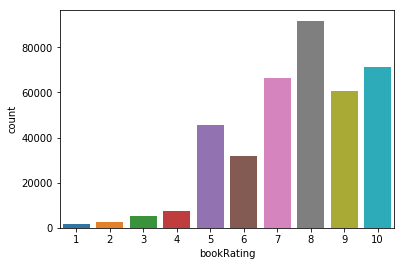

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=ratings_explicit, x = 'bookRating')
plt.show()  
#As per plot we see rating of value 8 has been given highest number of times

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [176]:
counts_df = ratings_explicit['userID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts_df[counts_df >= 100].index)]
counts_new = ratings_explicit['bookRating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts_new[counts_new >= 100].index)]

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [177]:
ratings_matrix = ratings_explicit.pivot(index='userID',columns = 'ISBN',values = 'bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66572)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
ratings_matrix.fillna(value=0,inplace=True)
ratings_matrix.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Generate the predicted ratings using SVD with no.of singular values to be 50

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [180]:
userID = 2110

In [181]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [ ]:
user_data = 

In [67]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [68]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [ ]:
user_full_info = pd.concat([user_data, book_data])

In [70]:
book_data.shape

(103, 5)

In [71]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


In [73]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user